classes = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
super_classes = ['directions', 'commands', 'binary_commands']
directions = left, right, up, down
commands = stop, go
binary_commands = on, off, yes, no

In [3]:
import random
import os
import shutil
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [20]:
# subfolders in dataset_mini no longer have only 500 files!!!
classes =  ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
for i in classes:
    files = os.listdir(i)
    print(files)
    n = 500
    file_indices = random.sample(range(0, len(files)), n)
    print(len(file_indices))
    for j in file_indices:
    #j = file_indices[0]
        #print(files[j])
        shutil.copyfile(i + '/' + files[j], 'dataset_mini/' + i + '/' + files[j])

['9bea2ac7_nohash_0.wav', 'baeac2ba_nohash_2.wav', 'f0ae7203_nohash_1.wav', 'bbd0bbd0_nohash_4.wav', '2dce72b3_nohash_0.wav', 'fde2dee7_nohash_1.wav', 'b00c4c53_nohash_0.wav', '5c8af87a_nohash_1.wav', 'eb3f7d82_nohash_2.wav', 'd197e3ae_nohash_2.wav', '3f339c33_nohash_0.wav', '4f2ab70c_nohash_2.wav', '5c39594f_nohash_2.wav', '324210dd_nohash_3.wav', '099d52ad_nohash_4.wav', '16d41d07_nohash_2.wav', '069ab0d5_nohash_1.wav', '528f9242_nohash_1.wav', '4f2ab70c_nohash_1.wav', '686d030b_nohash_1.wav', '72320401_nohash_0.wav', 'bab36420_nohash_3.wav', 'cb8f8307_nohash_0.wav', 'cb8f8307_nohash_1.wav', '87c62767_nohash_0.wav', '6c429c7b_nohash_2.wav', '3df9a3d4_nohash_1.wav', 'dca2797e_nohash_4.wav', 'f1d36c53_nohash_0.wav', '9aa21fa9_nohash_3.wav', 'af405b69_nohash_0.wav', 'cd7f8c1b_nohash_4.wav', '1a673010_nohash_2.wav', '01bb6a2a_nohash_0.wav', '0ea0e2f4_nohash_0.wav', '1dce06e8_nohash_0.wav', '9c06a3f3_nohash_2.wav', '94de6a6a_nohash_2.wav', 'c948d727_nohash_1.wav', '3bfd30e6_nohash_0.wav',

In [26]:
classes =  ['up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
for i in classes:
    path= os.path.join('dataset_mini', i)
    os.mkdir(path)

In [21]:
classes =  ['no', 'yes', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
parent_dir = 'dataset_mini/'
file_dict = { 'wav_file' : [], 'class': [], 'fold':[]}

for i in classes:
    class_dir = parent_dir+i
    files = [class_dir + '/' + j for j in os.listdir(class_dir)]
    fold = [random.randint(1,10) for i in range(len(files))]
    file_dict['wav_file'] += files
    file_dict['class'] += [i]*len(files)
    file_dict['fold'] += fold

print(file_dict)

{'wav_file': ['dataset_mini/no/c692524d_nohash_1.wav', 'dataset_mini/no/9bea2ac7_nohash_0.wav', 'dataset_mini/no/afb9e62e_nohash_1.wav', 'dataset_mini/no/541e4079_nohash_3.wav', 'dataset_mini/no/cb8f8307_nohash_1.wav', 'dataset_mini/no/66cbe2b3_nohash_1.wav', 'dataset_mini/no/a97017df_nohash_1.wav', 'dataset_mini/no/af405b69_nohash_0.wav', 'dataset_mini/no/2903efb3_nohash_0.wav', 'dataset_mini/no/0ea0e2f4_nohash_0.wav', 'dataset_mini/no/1dce06e8_nohash_0.wav', 'dataset_mini/no/1706c35f_nohash_1.wav', 'dataset_mini/no/62605293_nohash_0.wav', 'dataset_mini/no/b43c8f2f_nohash_1.wav', 'dataset_mini/no/5ff3f9a1_nohash_0.wav', 'dataset_mini/no/cd7f8c1b_nohash_1.wav', 'dataset_mini/no/b36c27c2_nohash_0.wav', 'dataset_mini/no/3f2b358d_nohash_4.wav', 'dataset_mini/no/bc196f81_nohash_0.wav', 'dataset_mini/no/6a497f80_nohash_0.wav', 'dataset_mini/no/da584bc0_nohash_1.wav', 'dataset_mini/no/742d6431_nohash_0.wav', 'dataset_mini/no/884ae8e1_nohash_1.wav', 'dataset_mini/no/951cac20_nohash_3.wav', 'd

In [22]:
df= pd.DataFrame(file_dict)
print(df)

                                   wav_file class  fold
0     dataset_mini/no/c692524d_nohash_1.wav    no     8
1     dataset_mini/no/9bea2ac7_nohash_0.wav    no     2
2     dataset_mini/no/afb9e62e_nohash_1.wav    no     9
3     dataset_mini/no/541e4079_nohash_3.wav    no    10
4     dataset_mini/no/cb8f8307_nohash_1.wav    no     9
...                                     ...   ...   ...
4495  dataset_mini/go/686d030b_nohash_4.wav    go     9
4496  dataset_mini/go/41474817_nohash_1.wav    go     8
4497  dataset_mini/go/a2fefcb4_nohash_0.wav    go     2
4498  dataset_mini/go/86fa2dcd_nohash_0.wav    go     6
4499  dataset_mini/go/cee22275_nohash_1.wav    go     5

[4500 rows x 3 columns]


In [10]:
def extract_melspectrogram(wavpath, sample_rate=16000):
    sample_rate = 16000
    window_size = .025
    window_stride = 0.01
    n_dft = 512
    win_length = int(sample_rate * window_size)
    hop_length = int(sample_rate * window_stride)
    y, sr = librosa.load(wavpath, sr=sample_rate)
    y = y - y.mean()
    y = np.append(y[0],y[1:]-.97*y[:-1])
    # compute mel spectrogram
    stft = librosa.stft(y, n_fft=n_dft, hop_length=hop_length,
        win_length=win_length, window=scipy.signal.hamming)
    spec = np.abs(stft)**2
    mel_basis = librosa.filters.mel(sr=sample_rate, n_fft=n_dft, n_mels=40, fmin=20)
    melspec = np.dot(mel_basis, spec)
    logspec = librosa.power_to_db(melspec, ref=np.max)
    #librosa.display.specshow(logspec)
    logspec = np.transpose(logspec)
    if (logspec.shape[0] != 101): #zero pad short utterances
        zero_pad = np.zeros((101-logspec.shape[0], 40),dtype=np.float32)
        logspec= np.vstack((logspec,zero_pad))
    return logspec
    #return logspec_tensor

In [24]:
features=[]
labels=[]
folds=[]
sr=16000
for i in range(len(df)):
    fold=df["fold"].iloc[i]
    path=df["wav_file"].iloc[i]
    label = df["class"].iloc[i]
    #mfccs=extract_mfcc(path, sr)
    mfccs = extract_melspectrogram(path, sr)
    features.append(mfccs)
    folds.append(fold)
    labels.append(label)

le = LabelEncoder()
labels = le.fit_transform(labels)

In [33]:
print(labels)

tensor([3, 3, 3,  ..., 1, 1, 1])


In [26]:
features=torch.tensor(features)
labels=torch.tensor(labels)
folds=torch.tensor(folds)

In [27]:
# Saving the dataset to disk to prevent re-Loading
torch.save(features, "model_outputs/features_mfccs.pt")
torch.save(labels, "model_outputs/labels.pt")
torch.save(folds, "model_outputs/folds.pt")

In [48]:
# load dataset from disk
features=torch.load("model_outputs/features_mfccs.pt")#.to(device)
labels=torch.load("model_outputs/labels.pt")#.to(device)
folds=torch.load("model_outputs/folds.pt")#.to(device)

In [13]:
def get_dataset(skip_fold):
    local_features=[]
    local_labels=[]
    for i in range(len(folds)):
        #if folds[i]==skip_fold:
        #    continue
        local_features.append(features[i])
        local_labels.append(labels[i])
    local_features=torch.stack(local_features)
    local_labels=torch.stack(local_labels)
    print(local_features.size())
    return TensorDataset(local_features, local_labels)

In [50]:
# initialize dataset
dataset=get_dataset(skip_fold=10)
len(dataset)

torch.Size([4500, 101, 40])


4500

In [15]:
# split data into training and validation sets
val_size=int(0.1*len(dataset))
train_size=len(dataset)-val_size

train_ds, val_ds=random_split(dataset, [train_size, val_size])

len(train_ds), len(val_ds)

(4500, 500)

In [16]:
# initialize data loader
batch_size=128
train_loader=DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader=DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)


In [17]:
output_size = 3
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Model with two CNN layers followed by two fully-connected layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        #self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        #self.conv3 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(16 * 1000, 64)
        self.fc2 = nn.Linear(64, output_size)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        #x = F.relu(self.conv3(x))
        #x = self.pool(x)

        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
# verify model shape and dimensions will work with input data   
model = MyModel()
print(model)
input = torch.randn(128, 1, 101, 40)
model(input)
print(model(input).shape)

MyModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=16000, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=3, bias=True)
)
torch.Size([128, 3])


In [18]:
# Training loop
def train_network(model, train_loader, criterion, optimizer):
    for epoch in range(20):
        for i, (inputs, labels) in enumerate(train_loader, 0):
            optimizer.zero_grad()
            inputs = inputs.unsqueeze(1)
            outputs = model(inputs)
            loss = criterion(outputs,labels)
            loss.backward()
            optimizer.step()

        # Calculate accuracy of this training epoch
        acc = 0
        count = 0
        for inputs, labels in val_loader:
            inputs = inputs.unsqueeze(1)
            outputs = model(inputs)
            acc += (torch.argmax(outputs, 1) == labels).float().sum()
            count += len(labels)
        acc /= count
        print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

In [19]:
# Test model
def test_network(model, val_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs =inputs.unsqueeze(1)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Test accuracy: %d %%' % (100 * correct / total))

In [20]:
# Instantiate the model, loss function, and optimizer
model = MyModel()
#model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train_network(model, train_loader, criterion, optimizer)
test_network(model, val_loader)


Epoch 0: model accuracy 41.80%
Epoch 1: model accuracy 53.80%
Epoch 2: model accuracy 53.60%
Epoch 3: model accuracy 52.60%
Epoch 4: model accuracy 57.00%
Epoch 5: model accuracy 61.00%
Epoch 6: model accuracy 60.60%
Epoch 7: model accuracy 57.00%
Epoch 8: model accuracy 60.20%
Epoch 9: model accuracy 62.60%
Epoch 10: model accuracy 62.80%
Epoch 11: model accuracy 60.40%
Epoch 12: model accuracy 61.60%
Epoch 13: model accuracy 64.80%
Epoch 14: model accuracy 65.80%
Epoch 15: model accuracy 64.60%
Epoch 16: model accuracy 67.60%
Epoch 17: model accuracy 66.40%
Epoch 18: model accuracy 67.00%
Epoch 19: model accuracy 67.60%
Test accuracy: 67 %


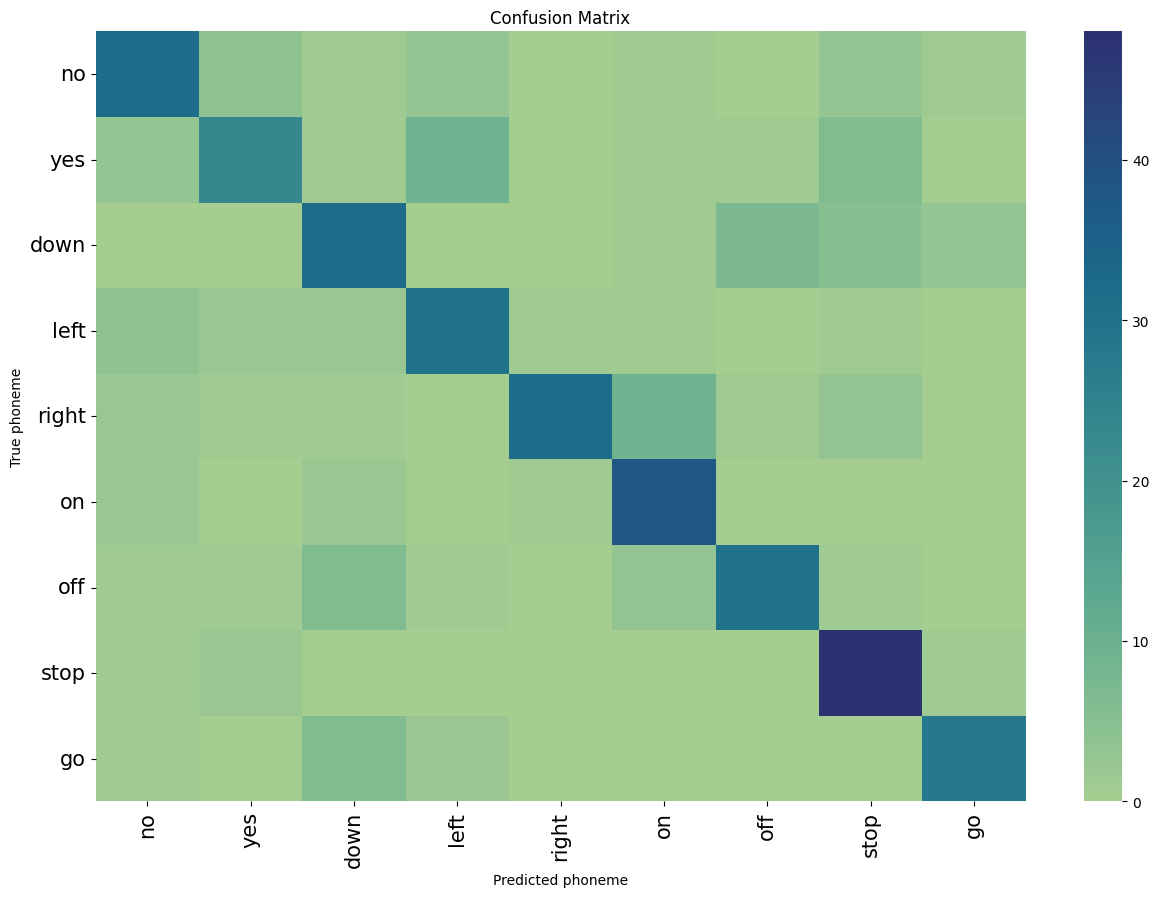

In [36]:
# plot confusion matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

confusion_matrix = torch.zeros(10, 10)
with torch.no_grad():
    for i, (inputs, labels) in enumerate(val_loader):
        inputs = inputs.unsqueeze(1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        for truth, predicted in zip(labels.view(-1), predicted.view(-1)):
                confusion_matrix[truth.long(), predicted.long()] += 1

plt.figure(figsize=(15,10))
df_cm = pd.DataFrame(confusion_matrix, index=classes, columns=classes).astype(int)
heatmap = sns.heatmap(df_cm, cmap="crest")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='center',fontsize=15)
plt.ylabel('True phoneme')
plt.xlabel('Predicted phoneme')
plt.title("Confusion Matrix")
plt.show()